In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import csv
from matplotlib.font_manager import FontProperties

In [17]:
header_rows = 0
testdata_freq = pd.read_csv('data/24.11.13/data1113_freq_10kSas.csv', skiprows=header_rows, nrows=2500000)
testdata_time = pd.read_csv('data/24.11.13/data1113_time_10kSas.csv', skiprows=header_rows, nrows=250000000)

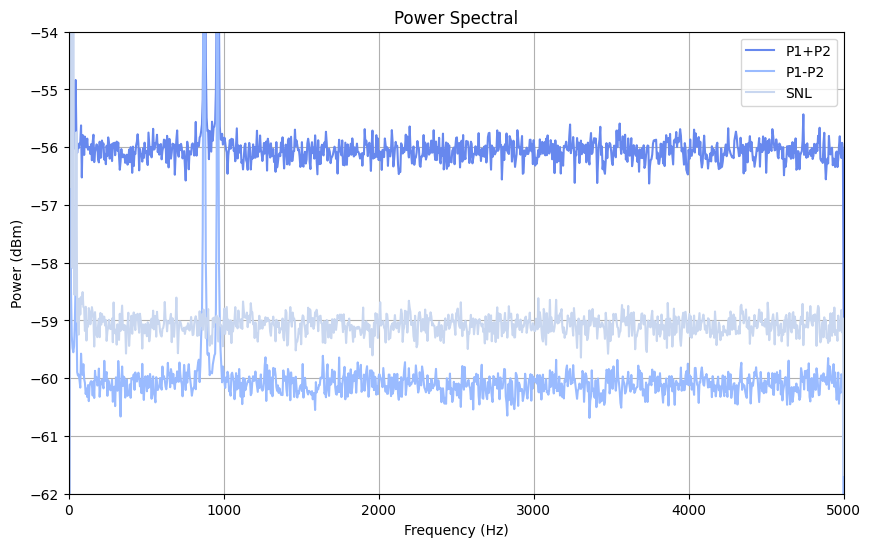

In [18]:
# Plot
yrange = 8
yref = -58
plt.figure(figsize=(10, 6))
plt.plot(testdata_freq['frequency'], testdata_freq['P1+P2'], label='P1+P2')
# plt.plot(testdata_freq['frequency'], testdata_freq['X1+X2(2)'], label='X1+X2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2'], label='P1-P2')
# plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2(2)'], label='P1-P2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['SNL'], label='SNL')

plt.title('Power Spectral')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(0,5000)
plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend()
plt.grid(True)
plt.show()

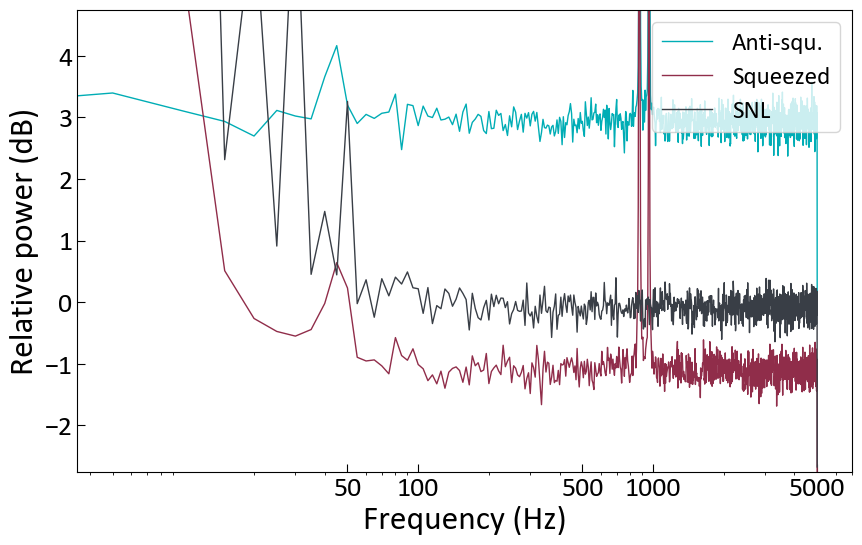

In [19]:
# Plot
yrange = 7.5
yref = 1
plt.figure(figsize=(10, 6))
plt.plot(testdata_freq['frequency'], testdata_freq['P1+P2']+59, color='#00adb5ff', linestyle='-', lw=1, label='Anti-squ.')
# plt.plot(testdata_freq['frequency'], testdata_freq['X1+X2(2)'], label='X1+X2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2']+59, color='#902d4aff', linestyle='-', lw=1, label='Squeezed')
# plt.plot(testdata_freq['frequency'], testdata_freq['P1-P2(2)'], label='P1-P2(2)')
plt.plot(testdata_freq['frequency'], testdata_freq['SNL']+59, color='#393e46ff', linestyle='-', lw=1, label='SNL')


# 设置字体和字体大小
title_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
label_font = {'family': 'calibri', 'color':  'black', 'weight': 'normal', 'size': 24}
# 设置图例字体
legend_font = FontProperties(family='calibri', weight='normal', size=18)
# 设置刻度字体
plt.xticks(fontsize=20, fontname='calibri', weight='normal', color='black')  # 设置x轴刻度字体
plt.yticks(fontsize=20, fontname='calibri', weight='normal', color='black')  # 设置y轴刻度字体
# 设置刻度线向内
plt.tick_params(axis='both', direction='in', length=6)  # 轴 'both' 表示x轴和y轴都应用此设置，direction='in' 表示刻度线向内，length=6 设置刻度线长度

# plt.title('Relative Power Spectral', fontdict=title_font)
plt.xlabel('Frequency (Hz)', fontdict=label_font)
plt.ylabel('Relative power (dB)', fontdict=label_font)

# 对数坐标
plt.xscale('log')
# plt.xlim(50, 5000)
# x_ticks = [50, 100, 500, 1000, 5000]  # 对数坐标的刻度位置
x_labels = ['50', '100', '500', '1000', '5000']  # 对应的标签
plt.xticks(ticks=x_ticks, labels=x_labels)

# 线性坐标
# plt.xlim(0,5000)

plt.ylim(yref-yrange/2, yref+yrange/2)
plt.legend(prop=legend_font, loc='upper right')
# plt.grid(True)
plt.savefig('data/2025.2.24longtime/压缩频域.svg', format='svg', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()

In [5]:
variances_raw = testdata_time.iloc[:, 1:].var()
variances = variances_raw / variances_raw['SNL']
print(variances)


X1+X2       0.740950
X1+P2       1.282123
P1+P2       1.568774
P1+X2       1.181501
P1-P2       0.711489
P1-X2       0.970498
X1-X2       1.571640
X1-P2       0.958872
X1+X2(2)    0.733691
X1+P2(2)    1.191049
P1+P2(2)    1.590501
P1+X2(2)    1.104571
P1-P2(2)    0.725382
P1-X2(2)    0.917159
X1-X2(2)    1.566131
X1-P2(2)    0.986321
X1          0.608877
X2          0.571132
P1          0.617868
P2          0.529025
SNL         1.000000
dtype: float64


In [6]:
matrix_qqpp = np.zeros((4, 4))
matrix_qpqp = np.zeros((4, 4))

matrix_qqpp[0, 0] = variances['X1']
matrix_qqpp[1, 1] = variances['X2']
matrix_qqpp[2, 2] = variances['P1']
matrix_qqpp[3, 3] = variances['P2']

matrix_qqpp[0, 1] = (-variances['X1-X2'] + variances['X1'] + variances['X2'])/2
# matrix_qqpp[0, 1] = (variances['X1+X2'] - variances['X1'] - variances['X2'])/2
matrix_qqpp[1, 0] = matrix_qqpp[0, 1]
matrix_qqpp[2, 3] = (-variances['P1-P2'] + variances['P1'] + variances['P2'])/2
# matrix_qqpp[2, 3] = (variances['P1+P2'] - variances['P1'] - variances['P2'])/2
matrix_qqpp[3, 2] = matrix_qqpp[2, 3]

# matrix_qqpp[0, 2] = (-variances['X1-P1'] + variances['X1'] + variances['P2'])/2
# # matrix_qqpp[0, 2] = (variances['X1+P1'] - variances['X1'] - variances['P2'])/2
# matrix_qqpp[2, 0] = matrix_qqpp[0, 2]
# matrix_qqpp[1, 3] = (-variances['X2-P2'] + variances['X2'] + variances['P2'])/2
# # matrix_qqpp[1, 3] = (variances['X2+P2'] - variances['X2'] - variances['P2'])/2
# matrix_qqpp[3, 1] = matrix_qqpp[1, 3]

matrix_qqpp[0, 3] = (-variances['X1-P2'] + variances['X1'] + variances['P2'])/2
# matrix_qqpp[0, 3] = (variances['X1+P2'] - variances['X1'] - variances['P2'])/2
matrix_qqpp[3, 0] = matrix_qqpp[0, 3]
matrix_qqpp[1, 2] = (-variances['P1-X2'] + variances['P1'] + variances['X2'])/2
# matrix_qqpp[1, 2] = (variances['P1+X2'] - variances['P1'] - variances['X2'])/2
matrix_qqpp[2, 1] = matrix_qqpp[1, 2]


print(matrix_qqpp)

matrix_qpqp[0, 0] = matrix_qqpp[0, 0]
matrix_qpqp[0, 1] = matrix_qqpp[0, 2]
matrix_qpqp[0, 2] = matrix_qqpp[0, 1]
matrix_qpqp[0, 3] = matrix_qqpp[0, 3]
matrix_qpqp[1, 0] = matrix_qqpp[2, 0]
matrix_qpqp[1, 1] = matrix_qqpp[2, 2]
matrix_qpqp[1, 2] = matrix_qqpp[2, 1]
matrix_qpqp[1, 3] = matrix_qqpp[2, 3]
matrix_qpqp[2, 0] = matrix_qqpp[1, 0]
matrix_qpqp[2, 1] = matrix_qqpp[1, 2]
matrix_qpqp[2, 2] = matrix_qqpp[1, 1]
matrix_qpqp[2, 3] = matrix_qqpp[1, 3]
matrix_qpqp[3, 0] = matrix_qqpp[3, 0]
matrix_qpqp[3, 1] = matrix_qqpp[3, 2]
matrix_qpqp[3, 2] = matrix_qqpp[3, 1]
matrix_qpqp[3, 3] = matrix_qqpp[3, 3]
print(matrix_qpqp)

[[ 0.60887691 -0.19581562  0.          0.08951477]
 [-0.19581562  0.57113222  0.10925116  0.        ]
 [ 0.          0.10925116  0.61786801  0.21770192]
 [ 0.08951477  0.          0.21770192  0.52902511]]
[[ 0.60887691  0.         -0.19581562  0.08951477]
 [ 0.          0.61786801  0.10925116  0.21770192]
 [-0.19581562  0.10925116  0.57113222  0.        ]
 [ 0.08951477  0.21770192  0.          0.52902511]]


In [11]:
def is_entangled(cov_matrix):
    """判断一个双模协方差矩阵是否符合 PPT 判据（是否纠缠）。
    
    参数：
    cov_matrix (np.ndarray): 4x4 的双模协方差矩阵。
    
    返回：
    bool: True 表示纠缠（不满足 PPT 判据），False 表示可分（满足 PPT 判据）。
    """
    # 辛矩阵
    Omega = np.array([[0, 1], [-1, 0]])
    Omega = np.kron(Omega, np.eye(2))
    
    P = np.diag([1, 1, 1, -1])
    
    # 计算 PPT 后的协方差矩阵
    cov_ppt = P @ cov_matrix @ P
    
    # 计算 (V_ppt + i * Omega) 的最小特征值
    symplectic_eigenvalues = np.linalg.eigvalsh(cov_ppt + 1j * Omega)
    print(f"symplectic_eigenvalues = {symplectic_eigenvalues}")
    min_eigenvalue = np.min(symplectic_eigenvalues)
    print(f"min_eigenvalue = {min_eigenvalue}")
    entangled = min_eigenvalue < 0
    print(f"该量子态是否纠缠: {'是' if entangled else '否'}")

    return min_eigenvalue

# 检查该态是否纠缠
min_eigenvalue = is_entangled(matrix_qpqp)

symplectic_eigenvalues = [-0.53806061 -0.34254141  1.50618389  1.70132036]
min_eigenvalue = -0.5380606087974847
该量子态是否纠缠: 是


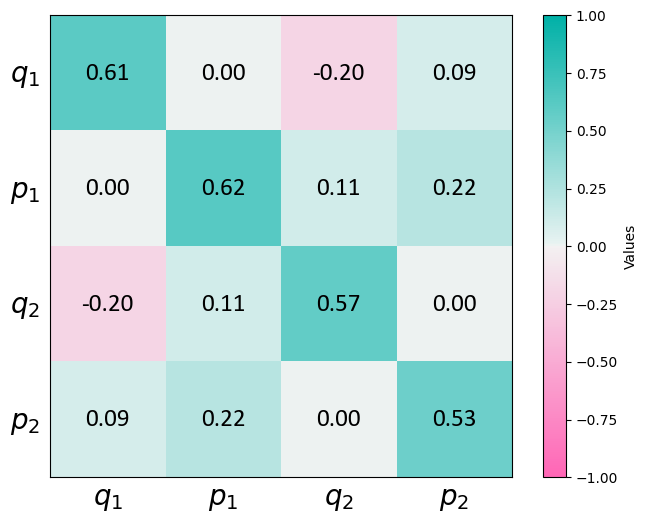

In [15]:
import seaborn as sns

# 使用 Seaborn 自定义调色板
# 创建一个调色板，可以是预定义的，也可以是自定义的
sns.set_palette("coolwarm")  # 设置默认调色板（可选）
custom_palette = sns.diverging_palette(342, 183, s=100, l=65, as_cmap=True)  # 获取调色板并转化为 colormap

# 创建绘图
plt.figure(figsize=(8, 6))
plt.imshow(matrix_qpqp, cmap=custom_palette, interpolation='none', vmax=1, vmin=-1)
plt.colorbar(label='Values')

# 设置 x 和 y 轴的刻度标签
plt.xticks(ticks=[0, 1, 2, 3], labels=['$q_1$', '$p_1$', '$q_2$', '$p_2$'], fontsize=20, fontname='calibri', weight='normal', color='black')
plt.yticks(ticks=[0, 1, 2, 3], labels=['$q_1$', '$p_1$', '$q_2$', '$p_2$'], fontsize=20, fontname='calibri', weight='normal', color='black')

# 在每个点上标注数值
for i in range(matrix_qpqp.shape[0]):  # 遍历行
    for j in range(matrix_qpqp.shape[1]):  # 遍历列
        # 在每个点的坐标 (j, i) 处标注数值
        plt.text(j, i, f'{matrix_qpqp[i, j]:.2f}', ha='center', va='center', color='black', fontsize=18, fontname='calibri')

# 关闭刻度线
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# plt.title('Covariance Matrix', fontdict=title_font)
plt.savefig('data/2025.1.15couple/协方差矩阵.svg', format='svg', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()

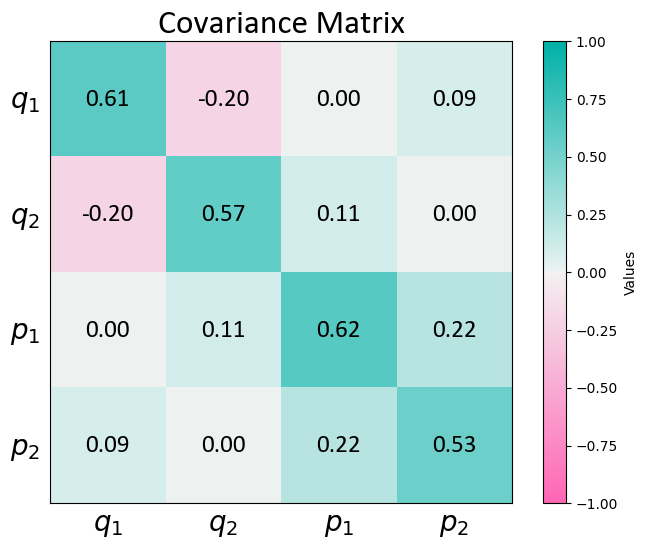

In [9]:
import seaborn as sns

# 使用 Seaborn 自定义调色板
# 创建一个调色板，可以是预定义的，也可以是自定义的
sns.set_palette("coolwarm")  # 设置默认调色板（可选）
custom_palette = sns.diverging_palette(342, 183, s=100, l=65, as_cmap=True)  # 获取调色板并转化为 colormap

# 创建绘图
plt.figure(figsize=(8, 6))
plt.imshow(matrix_qqpp, cmap=custom_palette, interpolation='none', vmax=1, vmin=-1)
plt.colorbar(label='Values')

# 设置 x 和 y 轴的刻度标签
plt.xticks(ticks=[0, 1, 2, 3], labels=['$q_1$', '$q_2$', '$p_1$', '$p_2$'], fontsize=20, fontname='calibri', weight='normal', color='black')
plt.yticks(ticks=[0, 1, 2, 3], labels=['$q_1$', '$q_2$', '$p_1$', '$p_2$'], fontsize=20, fontname='calibri', weight='normal', color='black')

# 在每个点上标注数值
for i in range(matrix_qqpp.shape[0]):  # 遍历行
    for j in range(matrix_qqpp.shape[1]):  # 遍历列
        # 在每个点的坐标 (j, i) 处标注数值
        plt.text(j, i, f'{matrix_qqpp[i, j]:.2f}', ha='center', va='center', color='black', fontsize=18, fontname='calibri')

# 关闭刻度线
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
plt.title('Covariance Matrix', fontdict=title_font)
plt.savefig('data/24.11.13/协方差矩阵qqpp.png', format='png', dpi=300)  # 可选择 'pdf' 或 'svg' 等格式
plt.show()